In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
from scipy import stats

In [2]:
kc_csv = pd.read_csv('./data/kc_house_data.csv')
kcdf = pd.DataFrame(kc_csv)

In [3]:
# this replaces all values to nan.
columns_to_replace = ['sqft_basement']
replace_column_w_nan(kcdf, columns_to_replace, '?')

?'s have been replaced with nan in all of these columns ['sqft_basement']


In [4]:
na_columns = ['view']
drop_na_rows(kcdf, na_columns)

na rows from these columns ,['view'], have been removed.


In [5]:
columns_to_drop = ['waterfront', 'yr_renovated','sqft_above','sqft_basement','lat','long']
drop_columns(kcdf, columns_to_drop)

['waterfront', 'yr_renovated', 'sqft_above', 'sqft_basement', 'lat', 'long'] have been dropped


In [6]:
strip_spaces(kcdf)

In [7]:
check_duplicates(kcdf)

You're all clear


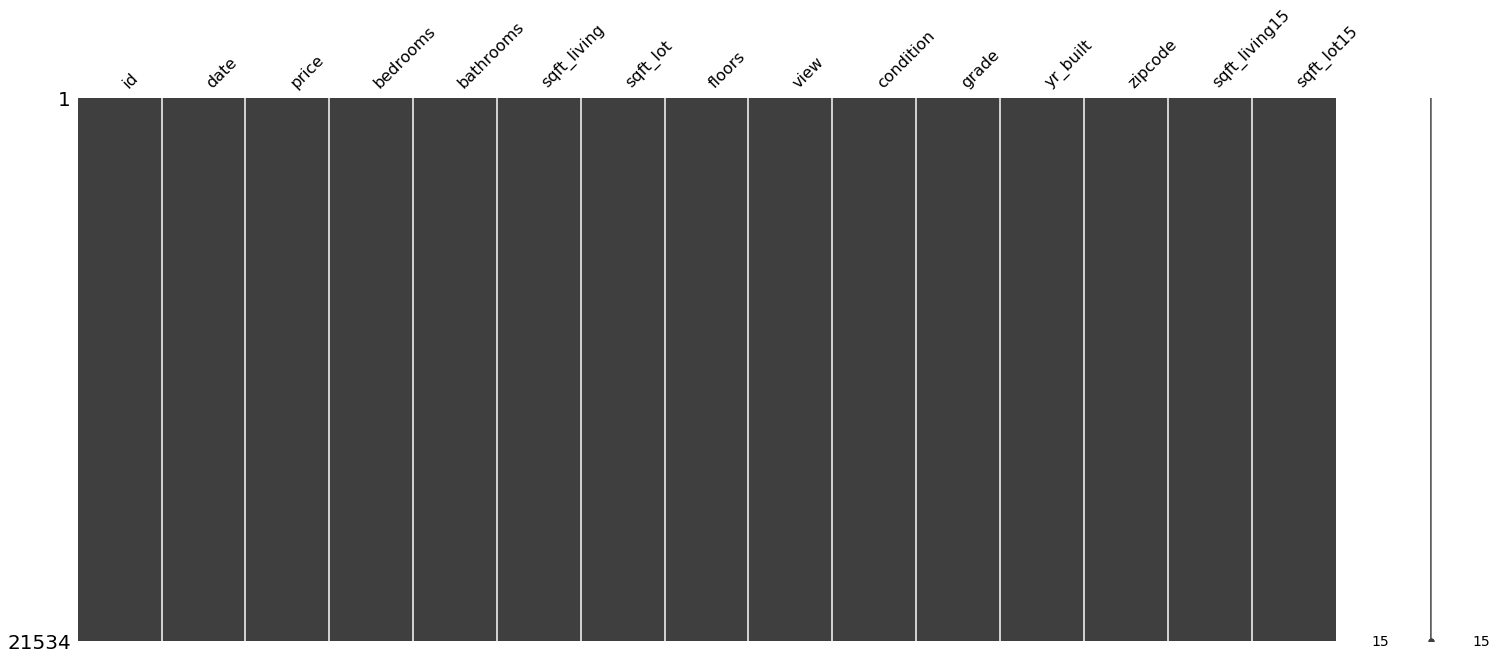

In [8]:
msno.matrix(kcdf)

We will calculate the z-scores for bathrooms to get rid of outliers. If a z-score is above 3, then we consider it an outlier and will remove it.

In [9]:
columns_with_outliers = ['bathrooms', 'bedrooms']

In [10]:
kcdf = remove_outliers(kcdf, columns_with_outliers)

In [11]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.130100e+04,2.130100e+04,21301.000000,21301.000000,21301.000000,2.130100e+04,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000
mean,4.588552e+09,5.290905e+05,3.347777,2.089303,2050.985869,1.489689e+04,1.489531,0.226187,3.411248,7.634900,1970.887095,98078.063847,1975.873527,12627.651753
std,2.877289e+09,3.295859e+05,0.865555,0.722385,861.676760,4.078791e+04,0.538916,0.751407,0.651379,1.144401,29.345295,53.512833,672.280276,26526.526949
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,399.000000,651.000000
25%,2.125049e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.029000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,1480.000000,5100.000000
50%,3.905010e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.590000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,1830.000000,7611.000000
75%,7.331900e+09,6.370000e+05,4.000000,2.500000,2520.000000,1.058400e+04,2.000000,0.000000,4.000000,8.000000,1996.000000,98118.000000,2350.000000,10042.000000
max,9.900000e+09,4.490000e+06,6.000000,4.250000,7850.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,98199.000000,6210.000000,871200.000000


Got rid of all our bathroom outliers by dropping the rows with a z-score above 3, but looking below the max number of bathrooms of kcdf is still at 8? Need to look into this more.

In [12]:
pickled_KC= pd.to_pickle(kcdf, './data/cleaned_KC.pkl')

In [13]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')

In [14]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,1800,7503
